# Systemy uczące się: Modele generatywne i dyskryminatywne

## Zadanie 1
Zadanie polega na implementacji klasyfikatora naiwnego Bayesa dla zmiennych ciągłych gdzie za rozkłady cechy przyjmij rozkłady normalne.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use("ggplot")

Do testowania twojego rozwiązania użyj trzech generatorów danych sztucznych `generate1`, `generate2` oraz `generate3` (funkcje te przyjmują jako argument liczbę elementów do wygenerowania z każdej klasy - domyślnie $N=100$). Sposób ich wywołania jest przedstawiony poniżej:

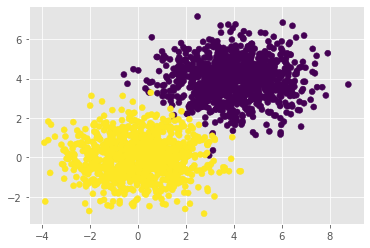

In [2]:
from helpers import generate1, generate2, generate3

X, y = generate1(1000)
plt.scatter(X[:,0], X[:,1], c = y)

W implementacji będzie przydatna klasa `norm` z pakietu `scipy`, która zwraca wartości funkcji gęstości prawdopodobieństwa rozkładu normalnego dla zmiennych ciągłych.

In [3]:
from  scipy.stats import norm

# (X, mean, std)
norm.pdf(5, 0, 1) #gęstość prawd. dla 5 z rozkładu standardowego
norm.logpdf(5, 0, 1) #logarytm gęstości prawd. dla 5 z rozkładu standardowego

-13.418938533204672

Zaimplementuj klasyfikator naiwnego Bayesa dla zmiennych ciągłych. Pamiętaj o zabezpieczniu się przed problemem wynikającym z mnożenia wielu małych liczb (prawdopodobieństw).

In [4]:

class GaussianNaiveBayes():
    def __init__(self):
        self.means = {}
        self.stds = {} 
        self.class_log_prob = {} 
        
    def fit(self, X, y):
        class_names = set(y)
        
        for class_name in class_names:
            values = [row[1] for row in zip(y, X) if row[0] == class_name]
            self.means[class_name] = np.array([np.mean([elem[i] for elem in values]) for i in range(0, len(values[0]))])
            self.stds[class_name] = np.array([np.std([elem[i] for elem in values]) for i in range(0, len(values[0]))])
            self.class_log_prob[class_name] = norm.logpdf((sum([1 for row in zip(y, X) if row[0] == class_name])) / len(y))
            
        
    def predict_proba(self, X):
        return np.array([[self.class_log_prob[j] + norm.logpdf(row[0], loc=self.means[j][0], scale=self.stds[j][0]) + norm.logpdf(row[1], loc=self.means[j][1], scale=self.stds[j][1]) for j in range(0, 2)] for row in X])
    
    def predict(self, X):
        prob = self.predict_proba(X)
        return np.argmax(prob, axis=1)


Przetestuj twój klasyfikator na wygenerowanych wcześniej danych.

In [5]:
gnb = GaussianNaiveBayes()
gnb.fit(X,y)
#Trafność na zbiorze uczącym
np.mean(gnb.predict(X) == y)

0.995

Narysowanie nauczonego klasyfikatora

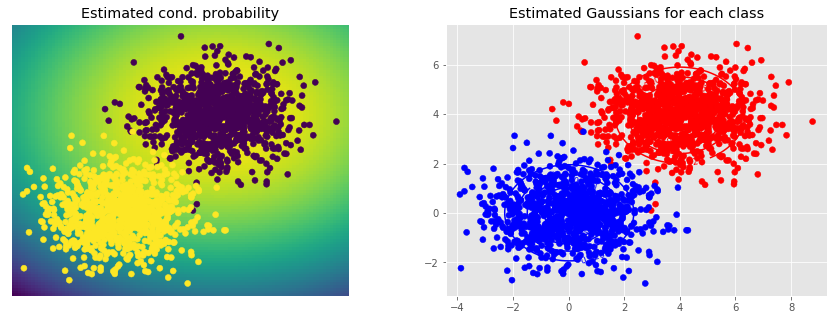

In [6]:
from helpers import plotGaussianBayes
plotGaussianBayes(X, y, gnb)

Użyj funkcji do generowania danych, aby wygenerować zbiór testowy oraz sprawdź na nim trafność klasyfikacji metody.

In [7]:
X_test, y_test = generate1(1000)
np.mean(gnb.predict(X_test) == y_test)

0.9915

In [8]:
# Tu będą testy sprawdzarki

**Ćwiczenia**
 - Pamiętaj o przetestowaniu Twojego algorytmu dla wszystkich trzech generatorów danych. W których ze zbiorów założenie o warunkowej niezależności zmiennych jest spełnione? Jak brak spełnienia tego założenia wpływa na działanie klasyfikatora?
 - Z pliku `helpers` zaimportuj klasę `GaussianBayes` (identyczna obsługa jak tej zaimplementowanej przez Ciebie). Klasa implementuje algorytm Bayesa bez założenia o niezależności zmiennych (ale z założeniem o normalności rozkładów). Porównaj wyniki - szczególnie dla zbiorów dla których założenie o warunkowej niezależności zmiennych nie jest spełnione.
 - Klasyfikatora `GaussianBayes` nie można wytrenować na zbiorach które mają mniej niż 3 przykłady dla każdej z klas. Jak myślisz dlaczego? Jak ten problem będzie się zmieniał dla zbiorów o wysokiej liczbie cech?
 - Nawet używając klasyfikatora `GaussianBayes`, który zakłada kompletny model zależności i prawidłowy rozkład danych (nasze dane są generowane z rozkładów normalnych) - często nie jest w stanie uzyskać 100% trafności nawet na zbiorze uczącym. Jak myślisz, dlaczego? 
 - Czy gdyby przepisać do klasyfikatora prawdziwe wartości średnich i macierz wariancji-kowariancji cech (z generatora) - uzyskalibyśmy 100% trafność? Co możemy powiedzieć o takim klasyfikatorze? Czy jest możliwe uzyskanie klasyfikatora bardziej trafnego niż taki? 
 
 Odpowiedzi na dwa ostatnie pytania zostaną sprawdzone: wpisz swoje odpowiedzi poniżej.

YOUR ANSWER HERE

1. Trzeci zbiór nie posiada niezależności danych. Widać to zarówno na rysunku, jak i w końcowym wyniku klasyfikatora - spada on znacząco dla większego zbioru danych.

4. Mogą wystąpić dane odstające, które klasyfiktor pominie podczas nauki, a nie będą świadczyły o zależności danych. Dodatkowo komputer ma ograniczenia na przechowywanie danych - mogą wystąpić pewne zaokrąglenia. 

5. Myślę, że nie uzyskalibyśmy 100% pewności, że zawsze wszystkie dane zostaną poprawnie sklasyfikowane z powodu wartości odstających, natomiast będzie to najlepszy możliwy do uzyskania klasyfikator.

## Zadanie 2
Zaimplementuj algorytm naiwnego Bayesa dla binarnych cech. 

*Wskazówka:* W zależności od Twojej implementacji funkcja `np.nan_to_num` może być przydatna do zabezpieczenia się przed sytuacją mnożenia zerowego prawdopodobienstwa (logarytm 0 na komputerze to $-\infty$) przez zero.

In [9]:
from  scipy.stats import norm
class NaiveBayes():
    def __init__(self):
        self.prob = {}
        self.class_log_prob = {}
        
    def fit(self, X, y):
        class_names = set(y)
        
        for class_name in class_names:
            values = [row[1] for row in zip(y, X) if row[0] == class_name]
            self.prob[class_name] = np.array([np.mean([elem[i] for elem in values]) for i in range(0, len(values[0]))])
            self.class_log_prob[class_name] = norm.logpdf((sum([1 for row in zip(y, X) if row[0] == class_name])) / len(y))
       
    def predict_proba(self, X):
        return np.array([[self.class_log_prob[j] + sum([sum([norm.logpdf(row[i], loc=self.prob[j][i])]) for i in range(0, len(row))]) for j in range(0, 2)] for row in X])
    
        
    def predict(self,X):
        prob = self.predict_proba(X)
        return np.argmax(prob, axis=1)

Przetestuj algorytm dla podanych danych. 

In [10]:
nb = NaiveBayes()
X = np.array([[1,1,1], [0,1,1], [0,0,1], [0,0,0]])
y = np.array([1,1,0,0])
nb.fit(X,y)
nb.predict_proba(X)
# np.mean(nb.predict(X) == y)

array([[-4.92575413, -3.92575413],
       [-4.42575413, -3.92575413],
       [-3.92575413, -4.42575413],
       [-3.92575413, -4.92575413]])

In [11]:
# Tu będą testy sprawdzarki

Podejrzyjmy wyestymowane wartości prawdopodobieństw:

In [12]:
nb.prob

{0: array([0. , 0. , 0.5]), 1: array([0.5, 1. , 1. ])}

Spójrzmy na analogiczną listę estymat dla gotowej implementacji algorytmu `FullBayes` (czyli wersji algorytmu bez założenia o niezależności).

In [13]:
from helpers import FullBayes
fb = FullBayes()
fb.fit(X,y)
fb.prob

{1: {(0, 0, 0): 0,
  (0, 0, 1): 0,
  (0, 1, 0): 0,
  (0, 1, 1): 1,
  (1, 0, 0): 0,
  (1, 0, 1): 0,
  (1, 1, 0): 0,
  (1, 1, 1): 1,
  'suma': 2},
 0: {(0, 0, 0): 1,
  (0, 0, 1): 1,
  (0, 1, 0): 0,
  (0, 1, 1): 0,
  (1, 0, 0): 0,
  (1, 0, 1): 0,
  (1, 1, 0): 0,
  (1, 1, 1): 0,
  'suma': 2}}

Czy coś cię niepokoi w wyświetlonych estymacjach? Jak ten problem będzie się zmieniał w zależności od rozmiaru zbioru i rozmiaru wymiarowości?

## Zadanie 2b
W praktyce klasyfikator Naiwnego Bayesa nadal może słabo działać z powodu zerowych estymat. Zwróć uwagę, że niewidziana nigdy wcześniej wartość cechy w klasie spowoduje wyzerowanie całego prawdopodobieństwa, a nie jedynie jego obniżenie! W przypadku dużej liczby cech i małej liczby przykładów klasy jest spora szansa, że nie wystąpią w danych uczących wszystkie możliwe kombinacje wartości cechy z klasą, więc wystąpienie niewidzianej wartości w danych testowych nie powinno mieć tak silnego wpływu na decyzję.

W związku z tym najczęściej zamiast zwykłego zliczania stosujemy założenie, że każda wartość cechy wystąpiła jednokrotnie zanim jeszcze w ogóle zaczęliśmy zliczać dane z danych uczących (innymi słowy: każda wartość ma sztucznie zwiększoną liczbę wystąpień o 1).
$$P(x_i|y) = \frac{n_{y,x_i} +1 }{n_{y} + |x_i|}$$
gdzie $n_{y,x_i}$ to ile razy wystąpiła wartość cechy $x_i$ w klasie $y$ (zliczanie), $n_{y}$ to liczba przykładów klasy $y$, a $|x_i|$ to liczba możliwych wartości przyjmowanych przez cechę $x_i$ (dla cech binarnych $x_i=2$)


Rozszerz Twój kod o estymowanie prawdopodobieństwa estymatą Laplace'a

In [14]:
class SmoothNaiveBayes(NaiveBayes):     
    def fit(self, X, y):
        class_names = set(y)
        
        for class_name in class_names:
            values = [row[1] for row in zip(y, X) if row[0] == class_name]
            self.prob[class_name] = np.array([(sum([elem[i] for elem in values]) + 1) / (len(values) + 2) for i in range(0, len(values[0]))])
            self.class_log_prob[class_name] = norm.logpdf((sum([1 for row in zip(y, X) if row[0] == class_name])) / len(y))

Również przetestuj i porównaj uzyskane estymaty z wersją algorytmu bez rozmywania.

In [15]:
snb = SmoothNaiveBayes()
snb.fit(X,y)
snb.predict_proba(X)

array([[-4.48825413, -3.98825413],
       [-4.23825413, -3.98825413],
       [-3.98825413, -4.23825413],
       [-3.98825413, -4.48825413]])

In [16]:
# Tu będą testy sprawdzarki

Pora na test działania zaimplementowanych metod na większych zbiorach danych. W tym celu użyjemy funkcji `generate_binary`, która generuje sztuczne binarne dane. Jej pierwszym argumentem jest liczba przykładów uczących, a drugim argumentem jest liczba cech $k$. Poniższy kod nie tylko generuje dane, ale także dzieli je na cześć uczącą i testową.

In [17]:
from helpers import generate_binary
Xb, yb = generate_binary(10000, k = 20)
X_train, y_train = Xb[:9000], yb[:9000]
X_test, y_test = Xb[9000:], yb[9000:]

Wytrenuj na tych większych danych zaimplementowane przez ciebie algorytmy `NaiveBayes` i `SmoothNaiveBayes`. Dla każdego klasyfikatora zmierz trafność klasyfikacji i podejrzyj zawartości estymat `print(classifier.prob)`.

In [18]:
nb = NaiveBayes()
nb.fit(X_train,y_train)
print('NaiveBayes: ', np.mean(nb.predict(X_test) == y_test))
# print(nb_1.prob)

snb = SmoothNaiveBayes()
snb.fit(X_train,y_train)
print('SmoothNaiveBayes: ', np.mean(snb.predict(X_test) == y_test))
# print(snb_1.prob)

NaiveBayes:  0.456
SmoothNaiveBayes:  0.455


Ile estymat zawiera klasyfikator "pełny", a ile klasyfikator naiwny? Jak będzie się to zmieniać wraz z rosnącą liczbą wymiarów?

# Zadanie 2c
Zbadajmy zależność pomiędzy trafnością klasyfikacji zaimplementowanych metod przy zmieniającym się rozmiarze zbioru danych. Poniższy kod jest gotowy i początkowo nie musisz w nim nic modyfikować. Oprócz Twoich implementacji testowane są także gotowe metody `FullBayes` i `SmoothFullBayes` z `helpers`, które są pozbawione założenia o niezależności zmiennych.

In [19]:
from helpers import SmoothFullBayes, FullBayes, plotAccuracyIterationsPlot
from collections import defaultdict

#Generowanie danych
Xb, yb = generate_binary(5500, k = 10)  # <- Tu kontrolujesz liczbę cech
X_train, y_train = Xb[:5000], yb[:5000]
X_test, y_test = Xb[5000:], yb[5000:]

N = X_train.shape[0]
iterations = range(50,N,50)  # <- Kontrola ewaluowanych punktów (od 50 do N co 50)

results = defaultdict(list)
results_train = defaultdict(list)

for i in iterations:
    for classifier in [NaiveBayes(), SmoothNaiveBayes(), FullBayes(), SmoothFullBayes()]:
        classifier.fit(X_train[:i],y_train[:i])
        results_train[type(classifier).__name__].append(np.mean(classifier.predict(X_train[:i]) == y_train[:i]))
        results[type(classifier).__name__].append(np.mean(classifier.predict(X_test) == y_test))

# Tę ostatnią linijkę możesz chcieć wywoływać w osobnych komórkach, 
# tak aby na koniec porównać wykresy dla kliku ustawień
# plotAccuracyIterationsPlot(iterations, results, results_train)
# tworzenie dodatkowego wykresu bez zwykłego NB
# del results_train[type(NaiveBayes()).__name__]
# del results[type(NaiveBayes()).__name__]
# plotAccuracyIterationsPlot(iterations, results, results_train)

E:\Ewa - studia\studia z laptopa Macieja\mgr\semestr I\Systemy_Uczące_się\lab2\Bayes\helpers.py:63: RuntimeWarning: divide by zero encountered in log
  results [i,j] += np.nan_to_num(np.log(self.prob[j][self._hash_example(X[i])] /self.prob[j][SUM] ))
E:\Ewa - studia\studia z laptopa Macieja\mgr\semestr I\Systemy_Uczące_się\lab2\Bayes\helpers.py:65: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= np.sum(probabilities, axis=1, keepdims=True)


Wykonaj ekspermenty dla różnej liczby cech: 2, 10, 100, 500

In [20]:
from helpers import plotAccuracyIterationsPlot


**Ćwiczenia**

 - Czy rozmywanie ma pozytywne skutki dla klasyfikatora naiwnego? a dla klasyfikatora `FullBayes`?
 - Który klasyfikator z testowanych jest najlepszy w jakich sytuacjach?
 - Jaką trafność  ma klasyfikator `FullBayes` na dostatecznie dużym zbiorze uczączym? W jakich sytuacjach `NaiveBayes` mógłby również osiągnąć 100% na uczącym?
 - Czy jest możliwe, żeby klasyfikator `FullBayes` nie będzie miał 100% trafności (nawet zakładając nieskończenie wielki zbiór danych)?
 - Przeanalizuj wygenerowane wcześniej wykresy określając czy mówimy o przeuczeniu czy niedouczeniu czy ...
 - Czy można w jednym klasyfikatorze Naiwnego Bayesa łączyć cechy ciągłe z dyskretnymi? Dlaczego?
 - W jaki sposób można obejść powyższy problem? Podaj co najmniej dwa sposoby.
 - Klasyfikator naiwny robi założenie o warunkowej niezależności cech. Co mógłbyś zrobić jeżeli spodziewasz się, że pewne pary/grupy cech są zależne i może to mieć duży wpływ na jakość predykcji? Podaj przykład takiej sytuacji.
 
 Odpowiedzi na kropki 3 i 4 oraz 8 zostaną ocenione - wpisz swoją odpowiedź poniżej.

YOUR ANSWER HERE

3.Klasyfikator FullBayes na większym zbiorze testowym osiąga 100% poprawności, jednak jest to związane z dłuższym czasem jego uczenia. NaiveBayes mógłby osiągnąć 100% poprawności, gdyby w zbiorze testowym znalazły się wszystkie przypadki testowe, a poszczególne cechy zbioru byłyby niezależne od siebie.

4.Nie, klasyfikator FullBayes zawiera wszystkie możliwości, więc zawsze będzie odpowiadał poprawnie. 

8.Można spróbować połączyć te cechy w jedną lub wybrać tylko jedną z nich podczas oceny prawdopodobieństwa, a pozostałe pominąć. Przykładem ilustrującym taką sytuację mogłoby być przeciętna waga i przeciętny wzrost człowieka. Zaproponowane rozwiązanie na pewno nie sprawdziło by się podczas badania nadwagi lub niedowagi, ale mogłoby być przydatne np. w określeniu przewidywanego wieku badanej osoby.

Ponieważ eksperymenty w tym ćwiczeniu są kosztowne obliczeniowo -- zakomentuj kody generujące wykresy, aby sprawdzarka szybkiej wywołała kod. Z góry dziękuję!

# Zadanie 3
Klasyfikator naiwnego Bayesa często jest używany do klasyfikacji tekstów. Przetestuj działanie algorytmów na podanym rzeczywistym zbiorze danych: 
> The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon a messages posted before and after a specific date.

Podany zbiór jest wieloklasowy, więc poniższy kod wybiera z niego podzbiór postów tylko z dwóch tematów.

In [21]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

categories = [  'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories)

vectorizer = TfidfVectorizer(binary=True, use_idf=False, norm=None) # Przekształcenie tekstu na cechy binarne
vectors = vectorizer.fit_transform(newsgroups_train.data)
vectors_test = vectorizer.transform(newsgroups_test.data)
vectors = vectors.toarray()
vectors_test = vectors_test.toarray()

Dokumenty w zbiorze można wyświetlić w następujący sposób.

In [22]:
newsgroups_train.data[0:3]

['From: ab@nova.cc.purdue.edu (Allen B)\nSubject: Re: thining algorithm\nOrganization: Purdue University\nLines: 15\n\nIn article <1q7615INNmi@shelley.u.washington.edu> kshin@stein.u.washington.edu  \n(Kevin Shin) writes:\n> I am trying obtain program to preprocess handwriting characters.\n> Like thining algorithm, graph alogrithm.\n> Do anyone know where I can obtain those?\n\nI usually use "Algorithms for graphics and image processing" by\nTheodosios Pavlidis, but other people here got them same idea and now\n3 of 4 copies in the libraries have been stolen!\n\nAnother reference is "Digital Image Processing" by Gonzalez and\nWintz/Wood, which is widely available but a little expensive ($55\nhere- I just checked today).\n\nab\n',
 "From: stephens@geod.emr.ca (Dave Stephenson)\nSubject: Re: Clementine Science Team Selected\nNntp-Posting-Host: ngis.geod.emr.ca\nOrganization: Dept. of Energy, Mines, and Resources, Ottawa\nLines: 32\n\nnickh@CS.CMU.EDU (Nick Haines) writes:\n\n>In article 

Analogicznie możemy uzyskać dostęp do informacji o klasach.

In [23]:
newsgroups_train.target[0:3]

array([0, 1, 0], dtype=int64)

i do "zbinaryzowanego" tekstu

In [24]:
vectors[0:3]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Wytrenuj klasyfikator Naiwnego Bayesa i sprawdż jego trafność na zbiorze uczącym i testowym.
UWAGA: wytrenowany klasyfikator powinien być przypisany do zmiennej `nb` na której `nb.predict()` zostaną wykonane testy

In [25]:
nb = NaiveBayes()
nb.fit(vectors, newsgroups_train.target)
print('NaiveBayesTrain: ', np.mean(nb.predict(vectors) == newsgroups_train.target))
print('NaiveBayesTest: ', np.mean(nb.predict(vectors_test) == newsgroups_test.target))

NaiveBayesTrain:  0.8292268479184367
NaiveBayesTest:  0.7969348659003831


In [26]:
# Tu będą testy

**Ćwiczenia**
 - Dlaczego klasyfikator Naiwnego Bayesa dość dobrze sprawdza się do powyższego zadania i analogicznych?
 - Przeanalizuj wartości estymat prawdopodobieństw. Które cechy/słowa są najlepszymi wskaźnikami dla podanych klas? Jakie słowa bardzo słabo wskazują na którąkolwiek z klas?
 - Czy byłoby możliwe wytrenowanie równie skutecznego klasyfikatora z mniejszą liczbą cech? W jaki sposób można by to uzyskać?
 - Analizowany zbiór jest oryginalnie wieloklasowy z tego powodu możemy go wykorzystać do wielu testów wybierając różne pary klas. Pełna lista tematów: 'alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc'
 - Czy są pary tematów dla których ten klasyfikator działa znacząco gorzej?
 - Jakie są zalety stosowania klasyfikatora Bayesa dla tego problemu (i w ogólności)? Czy do tego problemu sprawdziłyby się reguły lub drzewa decyzyjne? Dlaczego?
 
 Odpowiedzi na kropki 1, 3 i 6 wpisz poniżej - zostaną sprawdzone.

YOUR ANSWER HERE

1.Klasyfikator Naiwnego Bayesa dla każdego przypadku testowego sprawdza prawdopodobieństwo, że należy on do wybranej klasy. W tekstach często występuje słownictwo związane z daną dziedziną, więc im bardziej będą one od siebie niezależne, tym lepsze wyniki powinniśmy uzyskiwać, ponieważ słowa będą się jednoznacznie klasyfikowały.

3.Tak byłoby to możliwe w przypadku wybrania cech o dużym prawdopodobieństwie przynależności do danej klasy. Można wtedy pominąć słowa, które występują w obu klasach jednocześnie, bo one mogą nam zaburzać wyniki lub wcale na nie nie wpływać.

6.Klasyfikator Bayesa zmniejsza liczbę porównań podczas treningu. Drzewo decyzjne mogłoby zdecydowanie dłużej szukać rozwiązania, ponieważ dla każdej cechy mogłoby wyznaczyć kilka porównań, gdy klasyfikator Bayesa sprawdzi ogólne prawdopodobieństwo, nie biorąc pod uwagę niewielkich (czasem odstających) przypadków jako osobne decyzje. To może oczywiście powodować spadek wydajności w takich przypadkach, ale są one raczej rzadkie. 